In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('dataFiles/HINDUNILVR_cleaned.csv')
df = df[['Close', 'Open', 'Date']]
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)
df.head()

,Close,Open,Date,LogReturn
1,34.993568,34.623829,1996-01-02 00:00:00+05:30,0.010622
2,34.786304,34.993582,1996-01-03 00:00:00+05:30,-0.005941
3,34.789097,34.733077,1996-01-04 00:00:00+05:30,0.000080
4,34.733078,34.789098,1996-01-05 00:00:00+05:30,-0.001612
5,34.747086,34.733079,1996-01-08 00:00:00+05:30,0.000403


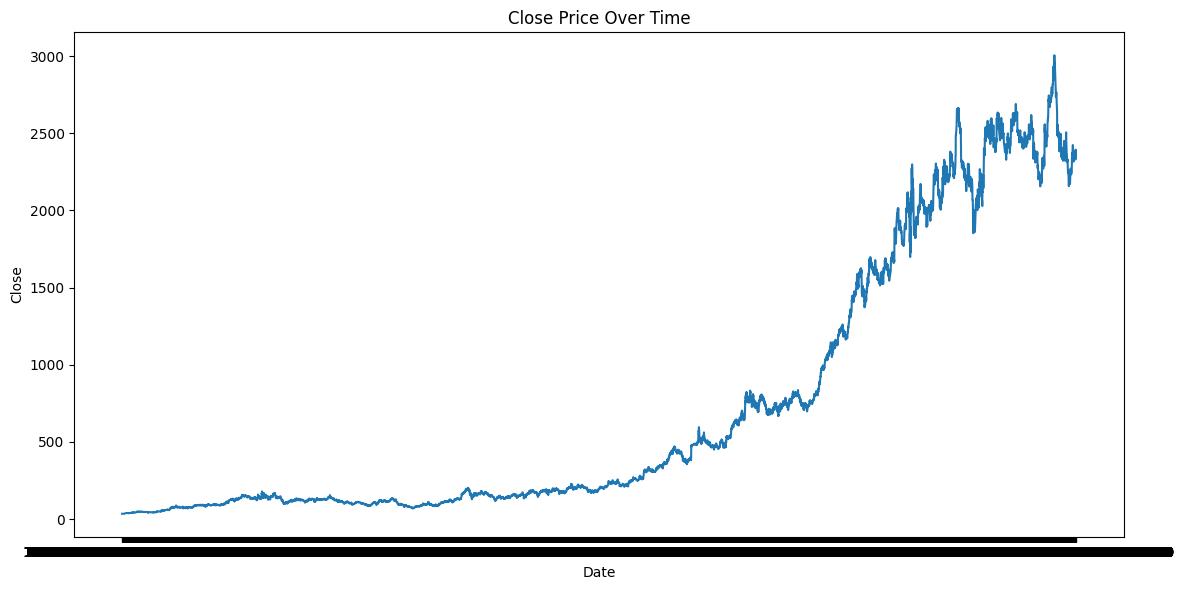

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.tight_layout()
plt.show()

In [42]:
look_back = 5

log_returns = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_returns = scaler.fit_transform(log_returns)

X, y = [], []
for i in range(look_back, len(scaled_returns)):
    X.append(scaled_returns[i - look_back:i])
    y.append(scaled_returns[i])

X, y = np.array(X), np.array(y)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [43]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50


/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 2/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 3.3302e-05 - val_loss: 4.6332e-04
Epoch 3/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 3.8166e-05 - val_loss: 5.5810e-04
Epoch 4/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 2.8560e-05 - val_loss: 5.4195e-04
Epoch 5/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 2.4753e-05 - val_loss: 2.7822e-04
Epoch 6/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 2.9052e-05 - val_loss: 0.0013
Epoch 7/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 2.1263e-05 - val_loss: 2.4539e-04
Epoch 8/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 1.9670e-05 - val_loss: 0.0014
Epoch 9/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 3.5671e-05 - val_loss: 2.9620e-04
Epoch 10/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 2.1557e-05 - val_loss: 2.9676e-04
Epoch 11/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 1.344

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step


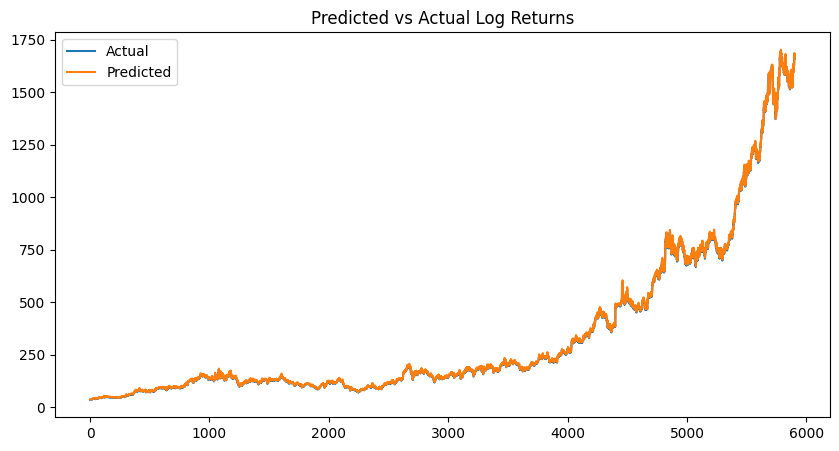

In [44]:
y_pred = model.predict(X_train)
y_pred_inv = scaler.inverse_transform(y_pred)
y_train_inv = scaler.inverse_transform(y_train)

plt.figure(figsize=(10, 5))
plt.plot(y_train_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Predicted vs Actual Log Returns')
plt.legend()
plt.show()

In [45]:
mse = mean_squared_error(y_train_inv, y_pred_inv)
mae = mean_absolute_error(y_train_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_train_inv, y_pred_inv)
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')

MSE: 62.5612
RMSE: 7.9096
R²: 0.9996
MAE: 5.1563
